In [36]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [37]:

# a. How many distinct patients are in the dataset?

import pandas as pd

def distinct_patients(patients: pd.DataFrame) -> int:
    return patients['patient_id'].nunique()

print("Distinct Patients: ", distinct_patients(catalog.load('staging_table_patients')))

[07/21/24 20:02:11] INFO     Loading data from staging_table_patients (SQLTableDataset)...      data_catalog.py:508

Distinct Patients:  10000


In [7]:
!pip install matplotlib

  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.0 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/8.0 MB 11.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/8.0 MB 17.6 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/8.0 MB 16.4 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/8.0 MB 16.4 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/8.0 MB 16.4 MB/s eta 0:00:01
   ------------------ ---------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


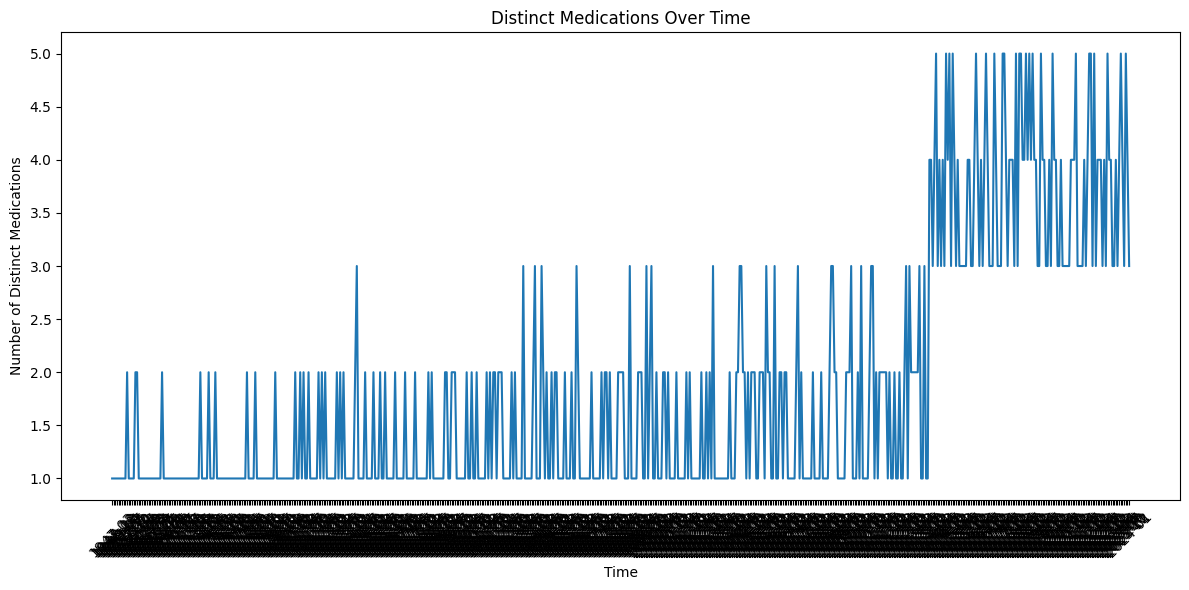

In [39]:
# b. Plot the distinct medications over time using a python plotting library. If you notice any duplicates, go back to your data cleaning section to fix.

medications_df = catalog.load('staging_table_medications')
medications_df.dtypes
medications_df['prescribing_date'] = pd.to_datetime(medications_df['prescribing_date'])

# Aggregate the number of distinct medications per time period (e.g., by month)
medications_df_clean['month'] = medications_df_clean['prescribing_date'].dt.to_period('M')
medication_counts = medications_df_clean.groupby('month')['ndc_code'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=medication_counts.index.astype(str), y=medication_counts.values)
plt.xlabel('Time')
plt.ylabel('Number of Distinct Medications')
plt.title('Distinct Medications Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



[07/21/24 20:41:31] INFO     Loading data from staging_table_patients (SQLTableDataset)...      data_catalog.py:508

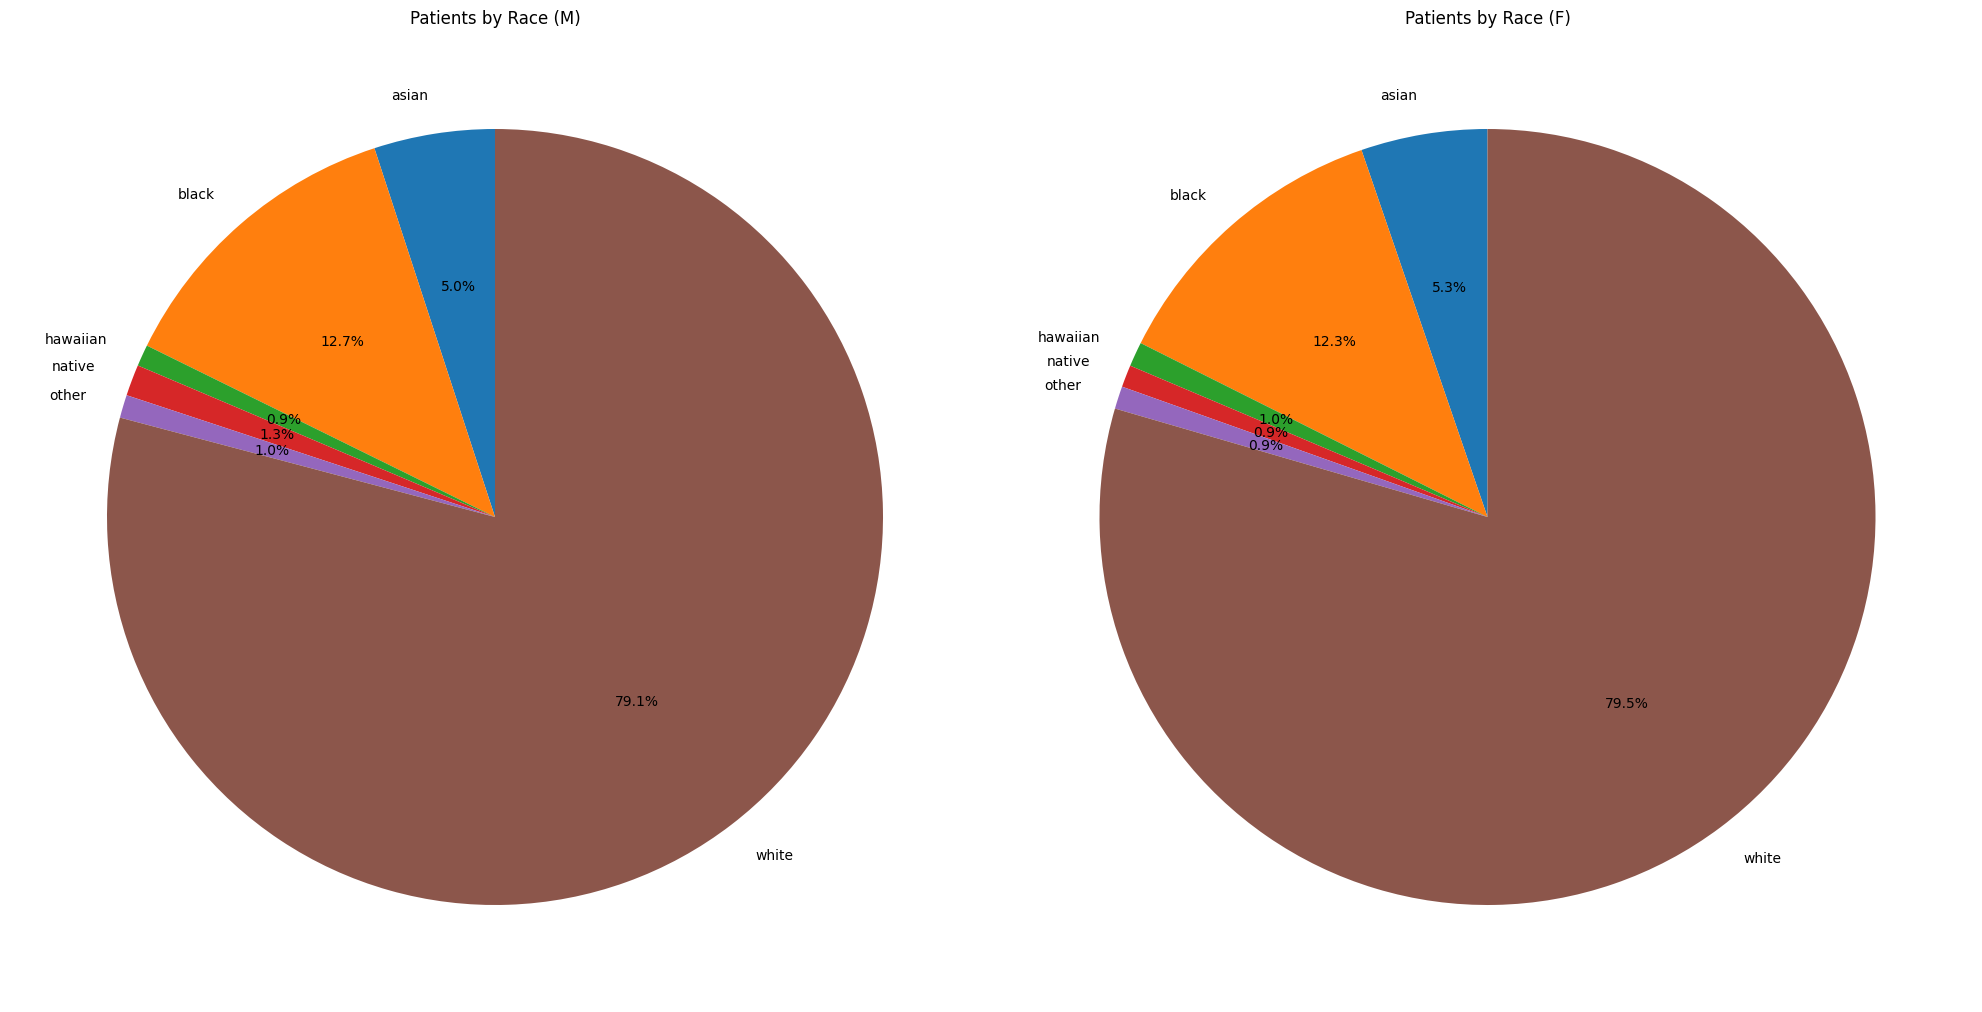

In [42]:
# c. Create a piechart indicating the percentage of patients across each racial category and gender.
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import io
import base64

# Load your dataset
patients = catalog.load('staging_table_patients')

# Count occurrences
race_gender_counts = patients.groupby(['race', 'sex']).size().reset_index(name='counts')

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Separate data for male and female
for sex, ax in zip(['M', 'F'], axes):
    data = race_gender_counts[race_gender_counts['sex'] == sex]
    ax.pie(data['counts'], labels=data['race'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Patients by Race ({sex})')

plt.tight_layout()

# Save to buffer
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
img_str = base64.b64encode(buf.read()).decode('utf-8')
buf.close()

# return img_str


In [44]:
# d. What percentage of patients have all 4 symptom categories ≥ 30?

observations = catalog.load('staging_table_observations')
qualifying_patients = observations[(observations['rash'] >= 30) & 
                                  (observations['joint_pain'] >= 30) & 
                                  (observations['fatigue'] >= 30) & 
                                  (observations['fever'] >= 30)]
percentage = (qualifying_patients['patient_id'].nunique() / observations['patient_id'].nunique()) * 100

print("Percentage of patients have all 4 symptom categories ≥ 30 is", percentage)

[07/21/24 20:42:00] INFO     Loading data from staging_table_observations (SQLTableDataset)...  data_catalog.py:508

Percentage of patients have all 4 symptom categories ≥ 30 is 0.0
